# $pK_a$ and $\sigma$ Values with Phenol Acids
We have seen that acid dissociation equilibrium constants for substituted benzoic acids **correlate** almost exactly to the Hammett substituent constants. That is because one is used to define the other. 

Now let us see how the effect of a substituent on **benzoic acid** (the Hammett $\sigma$ value) correlates to other acid equilibria. We will begin with **phenols**. 

To start, we will load our tools and data sets. then I will **merge and clean** the data as we saw in the previous exercise. Examine the code below and be sure to understand each line.

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def fill_sigma(df):     # a function to fill in sigma for empty spaces in s+ and S-
    for z in df.index:
        if np.isnan(df["s_plus"][z]):
            df["s_plus"][z] = df["sigma"][z]
        if np.isnan(df["s_minus"][z]):
            df["s_minus"][z] = df["sigma"][z]
    return(df)


df1 = pd.read_csv("../data/LFER_Williams.csv", 
                  delimiter = ",", 
                  index_col="Substituent", 
                  comment = "#", 
                  skipinitialspace = True
                 ) 
df2 = pd.read_csv("../data/ACID_williams_pKa.csv", 
                  delimiter = ",", 
                  index_col="Substituent", 
                  comment = "#", 
                  skipinitialspace = True
                 ) 
df1 = fill_sigma(df1)

df3 = df1.join(df2)
display(df3.head(5))

data = df3[["sigma", "s_plus", "s_minus", "PhOH_pKa"]]
data = data.dropna()

display(data.head(3))



,sigma,s_plus,s_minus,Page,BzOH_pKa,PhOH_pKa,Aniline pKa,DMA_pKa,Pyridine_pKa
Substituent,,,,,,,,,
m-Br,0.39,0.39,0.39,259.0,3.81,9.11,3.51,3.08,2.84
p-Br,0.23,0.15,0.25,259.0,4.00,9.34,3.91,3.52,NaN
m-C6H5,0.06,0.06,0.06,278.0,NaN,9.59,4.18,NaN,NaN
p-C6H5,-0.01,0.02,-0.18,278.0,NaN,9.51,4.27,NaN,NaN
m-CCCH3,0.10,0.10,0.10,265.0,NaN,NaN,NaN,NaN,NaN


,sigma,s_plus,s_minus,PhOH_pKa
Substituent,,,,
m-Br,0.39,0.39,0.39,9.11
p-Br,0.23,0.15,0.25,9.34
m-C6H5,0.06,0.06,0.06,9.59


## Plot the Data
Let us make a **quick plot** of the $\log(K_a)$ of phenols vs. the Hammett $\sigma$ parameter. How does it look?

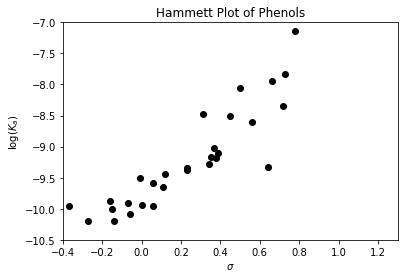

In [129]:
x = data["sigma"]
y = -data["PhOH_pKa"]

plt.plot(x, y, "ko")

plt.title("Hammett Plot of Phenols")               
plt.xlabel(r"$\sigma$")               
plt.ylabel(r"$\log(K_a)$")   

plt.xlim([-.4,1.3])
plt.ylim([-10.5,-7])

plt.show()



# Analyze the Data
That didn't look so good. If we look through the data we see that the **m-substituted phenols** seem to fall in a line while the **p-substituted** phenols scatted above that line. We can visualize this by **separating** the two sets. How could we do that? There are many ways,

I will try **sorting** the data by the index entries. All the "m"s will end up together.

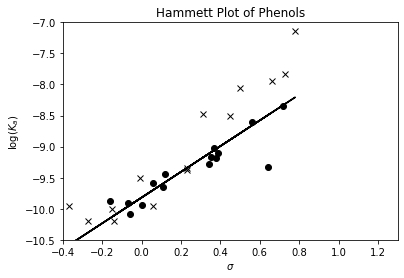

In [130]:
#data.loc[data.index[0][0]=="m"]

#data.loc[data[0][0] == "m"]
#data.iloc[0:4]

sort = data.sort_index()
meta = sort[0:15]
para = sort [15:]

x = meta["sigma"]
y = -meta["PhOH_pKa"]
plt.plot(x, y, "ko")

x = para["sigma"]
y = -para["PhOH_pKa"]
plt.plot(x, y, "kx")

y_list = 2.07*x-9.82
plt.plot(x, y_list, "k-")

plt.title("Hammett Plot of Phenols")               
plt.xlabel(r"$\sigma$")               
plt.ylabel(r"$\log(K_a)$")
plt.xlim([-.4,1.3])
plt.ylim([-10.5,-7])

plt.show()

## Again, with $\sigma^-$

We have learned that electron accepting substituents can have an outsized effect when in the **para position** of a phenol. So we should use Hammett parameters that take this into account.  The **Brown-Okamoto** $\sigma_p^-$ parameters may give better correlations. What do you think?

The slope is 1.69 +/- 0.35
The intercept is -9.74 +/- 0.18


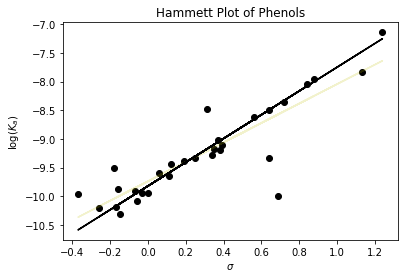

In [131]:
x = data["s_minus"]
y = -data["PhOH_pKa"]

plt.plot(x, y, "ko")

line = stats.linregress(x,y)
print("The slope is {:.2f} +/- {:.2f}".format(line.slope, 2*line.stderr))
print("The intercept is {:.2f} +/- {:.2f}".format(line.intercept, 2*line.intercept_stderr))

y_list = line.slope*x+line.intercept
plt.plot(x, y_list, "y-", alpha=0.2)

y_list = 2.07*x-9.82
plt.plot(x, y_list, "k-")

plt.title("Hammett Plot of Phenols")               
plt.xlabel(r"$\sigma$")               
plt.ylabel(r"$\log(K_a)$")         

plt.show()

## What is that data Point?

Some of the above points are far off the line. How can we **identifty** which substituent they are so that we can check the data sets. We can have MatPlotLib label the data points. For this we will have to use some **more advanced** features of the plotting system. 

Every plot is a combination of a **figure** (the sheet of paper on which the plot or plots are placed) and **axes** (the plots that are positioned in the figure). For the simple plots above, the system created a figure with a single axes within it. Below we will deal with the figure and axes as separate **objects**.

We will use the `matplotlib.pyplot.subplot()` function [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) to create objects for the figure and an axes. We will then manipulate the axes object to make a **scatter plot** using the `plot()` method [documenation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) built into an axes object. Then we will use the `annotate()` method [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html) to add **text and arrows**.

Consider the code below and observe how these features are used.

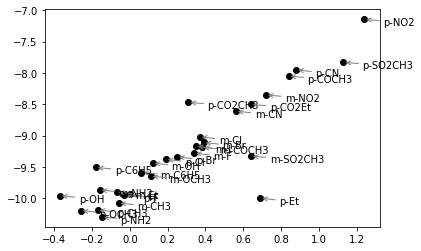

In [132]:

x = data["s_minus"]
y = -data["PhOH_pKa"]

fig, ax = plt.subplots()
ax.plot(x, y, "ko")

for i in range(len(x)):
    ax.annotate(x.index[i], 
                xy = (x[i], y[i]), 
                xytext=(x[i]+.1, y[i]-.1), 
                arrowprops={"arrowstyle":"->", "color":"gray"}
               )

## Comments on the Data
The **p-Et point** is way off the line. I checked the data and it was entered correctly. However the data set from Hansch, Leo & Taft gives the $\sigma_p^-$ value for p-Et to be $-0.19$ rather than $+0.69$. The negative value would fit on the trnd quite nicely. **Someone is wrong**. Track it down via the references to the original literature and add the entry to the **erratum** document.

The data point for **p-CO2CH3** also seems off the trend. It turns out that the Williams data set **does not include** a value for $\sigma_p^-$ in this case. My method above for **filling** the $\sigma_p$ values into empty $\sigma_p^-$ and $\sigma_p^+$ slots **betrayed us** here. The error is ours. In the Williams data there is a $\sigma_p^-$ for **p-CO2Et** of $+0.64$ as compared to the copied-across $\sigma_p$ value for p-CO2CH3 of $+0.31$.  the values are **expected to be similar** between CH3 and Et and if we **used** that $\sigma_p^-$ value we would be on the line. But perhaps we should **delete** that point since we do not have a correct $\sigma_p^-$ value in the data set. What do you think?

I also **checked** on a few others (p-C6H5 and p-OH) and they are correct as entered (although the data sets in the literature could have errors - trust no one.) I am also **deleting** the data points for **m,p-OH** and **m,p-SO2CH3**. The OH groups giive two identical acidic protons in each phenol. This may require an entropy correction. (I don't know, my thermodynamics are weak). the SO2CH3 data points have given me problems in other data sets so I am chopping them here. The **m,p-C6H5** substituents likely add a large solvation difference which affects the acid equilibrium and so I'll discount them as well. 

Below we will plot the data with the changes described above. How does it look now?



,sigma,s_plus,s_minus,PhOH_pKa
Substituent,,,,
m-Br,0.39,0.39,0.39,9.11
p-Br,0.23,0.15,0.25,9.34
m-C6H5,0.06,0.06,0.06,9.59
p-C6H5,-0.01,0.02,-0.18,9.51
m-CH3,-0.07,-0.07,-0.07,10.08
p-CH3,-0.17,-0.31,-0.17,10.19
m-Cl,0.37,0.37,0.37,9.02
p-Cl,0.23,0.11,0.19,9.38
m-CN,0.56,0.56,0.56,8.61


The slope is 1.99 +/- 0.13
The intercept is -9.82 +/- 0.06


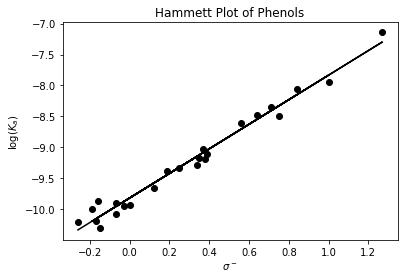

In [127]:
x = data["s_minus"]
y = -data["PhOH_pKa"]
display(data)
x["p-Et"] = -0.19                           # Error corrections
x["p-CO2CH3"] = +0.64

to_drop = ["p-OH", "m-OH", "p-C6H5", "m-C6H5", "p-SO2CH3", "m-SO2CH3"]
x.drop(labels=to_drop, inplace=True)         # poorly justified deletion of data points
y.drop(labels=to_drop, inplace=True)

plt.plot(x, y, "ko")

line = stats.linregress(x,y)
print("The slope is {:.2f} +/- {:.2f}".format(line.slope, 2*line.stderr))
print("The intercept is {:.2f} +/- {:.2f}".format(line.intercept, 2*line.intercept_stderr))

y_list = line.slope*x+line.intercept
plt.plot(x, y_list, "k-")

plt.title("Hammett Plot of Phenols")               
plt.xlabel(r"$\sigma^-$")               
plt.ylabel(r"$\log(K_a)$")         

plt.show()


## Side-by_Side
Below is a **figure with two plots**. One is the plot with $\sigma$ values and the other is with $\sigma^-$ values. This will compare the two parameter sets and how each correlates with the acidity of substituted phenols. **Observe** how each plot (axes) is created withing the figure object. MatPlotLib has many powerful features.

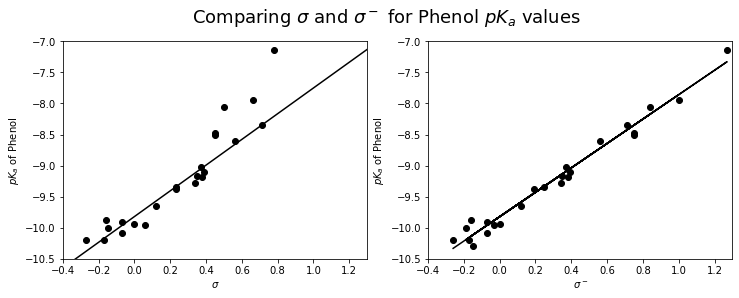

slope = 1.96, intercept = -9.82


In [122]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
fig.suptitle(r"Comparing $\sigma$ and $\sigma^-$ for Phenol $pK_a$ values", fontsize="18", y=1.0)


x, y = data["sigma"], -data["PhOH_pKa"] 

to_drop = ["p-OH", "m-OH", "p-C6H5", "m-C6H5", "p-SO2CH3", "m-SO2CH3"]
x.drop(labels=to_drop, inplace=True)               # deletion of data points
y.drop(labels=to_drop, inplace=True)

calc_y = 2.07*np.array([-.4,1.3]) - 9.82           # calculate the same line as the sigma- plot 

ax[0].plot(x,y, "ko")                              # plot the data from the dataframe
ax[0].plot(np.array([-.4,1.3]), calc_y, "k-")      # plot the line

ax[0].set(ylabel=r"$pK_a$ of Phenol",              # y-axis label
          xlabel=r"$\sigma$",                      # x-axis label
          xlim=[-.4,1.3],                          # x-axis limits
          ylim=[-10.5,-7.0])                       # y-axis limits


x, y = data["s_minus"], -data["PhOH_pKa"] 

to_drop = ["p-OH", "m-OH", "p-C6H5", "m-C6H5", "p-SO2CH3", "m-SO2CH3"]
x.drop(labels=to_drop, inplace=True)               # deletion of data points
y.drop(labels=to_drop, inplace=True)

linefit = stats.linregress(x,y)                    # perform a line fit
calc_y = linefit.intercept + linefit.slope * x     # calculate the y values for the line fit 

ax[1].plot(x,y, "ko")                              # plot the data from the dataframe
ax[1].plot(x, calc_y, "k-")                        # plot the line fit

ax[1].set(ylabel=r"$pK_a$ of Phenol",              # y-axis label
          xlabel=r"$\sigma^-$",                    # x-axis label
          xlim=[-.4,1.3],                          # x-axis limits
          ylim=[-10.5,-7.0])                       # y-axis limits

plt.show()
print("slope = {:.2f}, intercept = {:.2f}".format(linefit.slope, linefit.intercept))



## A Simpler Side by Side
I know the above looks like a lot of code. It is mostly **style** and data **editing**. We could express the same idea with the code below, where I just deleted most of the lines in the block above.

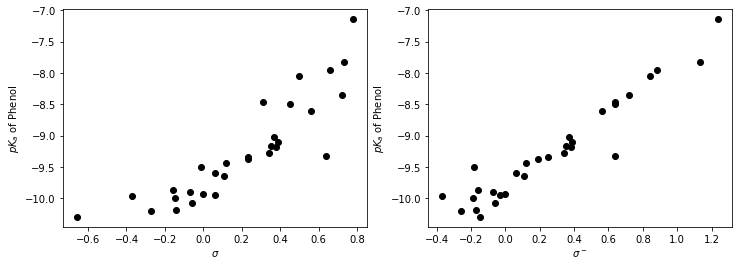

In [118]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))

x, y = data["sigma"], -data["PhOH_pKa"] 
ax[0].plot(x,y, "ko", label = "data")            # plot the data from the dataframe
ax[0].set(ylabel=r"$pK_a$ of Phenol", xlabel=r"$\sigma$")       

x, y = data["s_minus"], -data["PhOH_pKa"]  
ax[1].plot(x,y, "ko", label = "data")            # plot the data from the dataframe

linefit = stats.linregress(x,y)                  # perform a line fit
calc_y = linefit.intercept + linefit.slope * x   # calculate the y values for the line fit 
#ax[1].plot(x, calc_y, "b-", label = "line fit")  # plot the line fit
ax[1].set(ylabel=r"$pK_a$ of Phenol", xlabel=r"$\sigma^-$")       

plt.show()


## Another Data Set
We have already seen a **disagreement** between the Williams LFER data set and the Hansch, Leo & Taft data set. Let us now plot the phenol $pK_a$ data againts $\sigma$ and $\sigma^-$ values from the Hansch, Leo & Taft review. All we have to do is change the **filename** for the LFER data set.

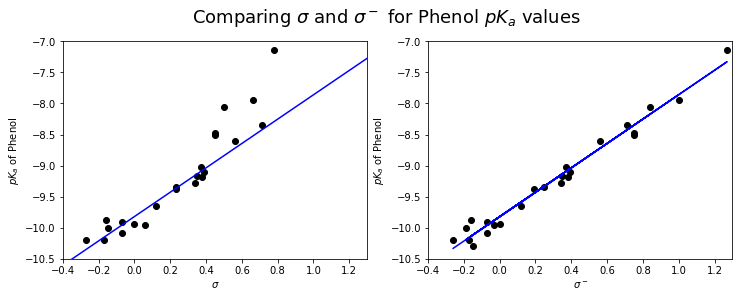

slope = 1.96, intercept = -9.82


In [119]:
df1 = pd.read_csv("../data/LFER_HanschLeoTaft.csv", 
                  delimiter = ",", 
                  index_col="Substituent", 
                  comment = "#", 
                  skipinitialspace = True
                 ) 
df2 = pd.read_csv("../data/ACID_williams_pKa.csv", 
                  delimiter = ",", 
                  index_col="Substituent", 
                  comment = "#", 
                  skipinitialspace = True
                 ) 
df1 = fill_sigma(df1)

df3 = df1.join(df2)
#display(df3.head(5))

data = df3[["sigma", "s_plus", "s_minus", "PhOH_pKa"]]
data = data.dropna()

#display(data.head(3))

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,4))
fig.suptitle(r"Comparing $\sigma$ and $\sigma^-$ for Phenol $pK_a$ values", fontsize="18", y=1.0)


x, y = data["sigma"], -data["PhOH_pKa"] 
to_drop = ["p-OH", "m-OH", "p-C6H5", "m-C6H5", "p-SO2CH3", "m-SO2CH3"]
x.drop(labels=to_drop, inplace=True)               # deletion of data points
y.drop(labels=to_drop, inplace=True)


calc_y = 1.96*np.array([-.4,1.3]) - 9.82           # calculate the same line as the sigma- plot 

ax[0].plot(x,y, "ko")                              # plot the data from the dataframe
ax[0].plot(np.array([-.4,1.3]), calc_y, "b-")      # plot the line

ax[0].set(ylabel=r"$pK_a$ of Phenol",              # y-axis label
          xlabel=r"$\sigma$",                      # x-axis label
          xlim=[-.4,1.3],                          # x-axis limits
          ylim=[-10.5,-7.0])                       # y-axis limits


x, y = data["s_minus"], -data["PhOH_pKa"] 
to_drop = ["p-OH", "m-OH", "p-C6H5", "m-C6H5", "p-SO2CH3", "m-SO2CH3"]
x.drop(labels=to_drop, inplace=True)               # deletion of data points
y.drop(labels=to_drop, inplace=True)


linefit = stats.linregress(x,y)                    # perform a line fit
calc_y = linefit.intercept + linefit.slope * x     # calculate the y values for the line fit 

ax[1].plot(x,y, "ko")                              # plot the data from the dataframe
ax[1].plot(x, calc_y, "b-")                        # plot the line fit

ax[1].set(ylabel=r"$pK_a$ of Phenol",              # y-axis label
          xlabel=r"$\sigma^-$",                    # x-axis label
          xlim=[-.4,1.3],                          # x-axis limits
          ylim=[-10.5,-7.0])                       # y-axis limits

plt.show()
print("slope = {:.2f}, intercept = {:.2f}".format(linefit.slope, linefit.intercept))


## Your Turn
Take this notebook or start a new one and cut-and-paste code into it. Then alter the code to make plots that **compare** the $\sigma$, $\sigma^+$, and $\sigma^-$ values with the $pK_a$ values of **other acids** in the Williams compilation and the Bordwell DMSO table. **Work** together with your classmates and **explain** your results, identify potential problems and **investigate** those problems.